## Machine Learning Argument Relation Classifier

In [1]:
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve

Load the Microtext dataset and look at the first few items

In [2]:
data = pd.read_csv('microtext.csv', encoding='latin-1')
data.head()

,Type,A,B
0,RA,It was clearly a mistake to include Tom in our...,"He's just not a team player, and often goes it..."
1,RA,A stop must be put to exorbitant rents by impo...,Plus everyone has to move approx. 3-10 times i...
2,CA,Hence it is good when shops are not open on Su...,"People, however, who work during the week and ..."
3,RA,the statutory retirement age should in the fut...,"and furthermore, due to today's healthcare mos..."
4,RA,Fear of punishment hence does not deter murder...,Despite the death penalty there are significan...


![alt text](a2.png)

Let's see how many of each class we have

In [3]:
data['Type'].value_counts()

RA    272
CA    108
Name: Type, dtype: int64

Remove stopwords and punctuation

In [4]:
nltk.download('stopwords')

def text_process(text):

    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

data['A'] = data['A'].apply(text_process)
data['B'] = data['B'].apply(text_process)
data.head()

[nltk_data] Downloading package stopwords to /home/john/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Type,A,B
0,RA,It was clearly a mistake to include Tom in our...,Hes just not a team player and often goes it a...
1,RA,A stop must be put to exorbitant rents by impo...,Plus everyone has to move approx 310 times in ...
2,CA,Hence it is good when shops are not open on Su...,People however who work during the week and on...
3,RA,the statutory retirement age should in the fut...,and furthermore due to todays healthcare most ...
4,RA,Fear of punishment hence does not deter murderers,Despite the death penalty there are significan...


We can now try to see a bit more what the dataset looks like by creating wordclouds for the 'B's in each class

In [5]:
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

ra_words = ''
ca_words = ''

for val in data[data['Type'] == 'RA'].B:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ra_words = ra_words + words + ' '

for val in data[data['Type'] == 'CA'].B:
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ca_words = ca_words + words + ' '

ra_wordcloud = WordCloud(width=500, height=300).generate(ra_words)
ca_wordcloud = WordCloud(width=500, height=300).generate(ca_words)


[nltk_data] Downloading package punkt to /home/john/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


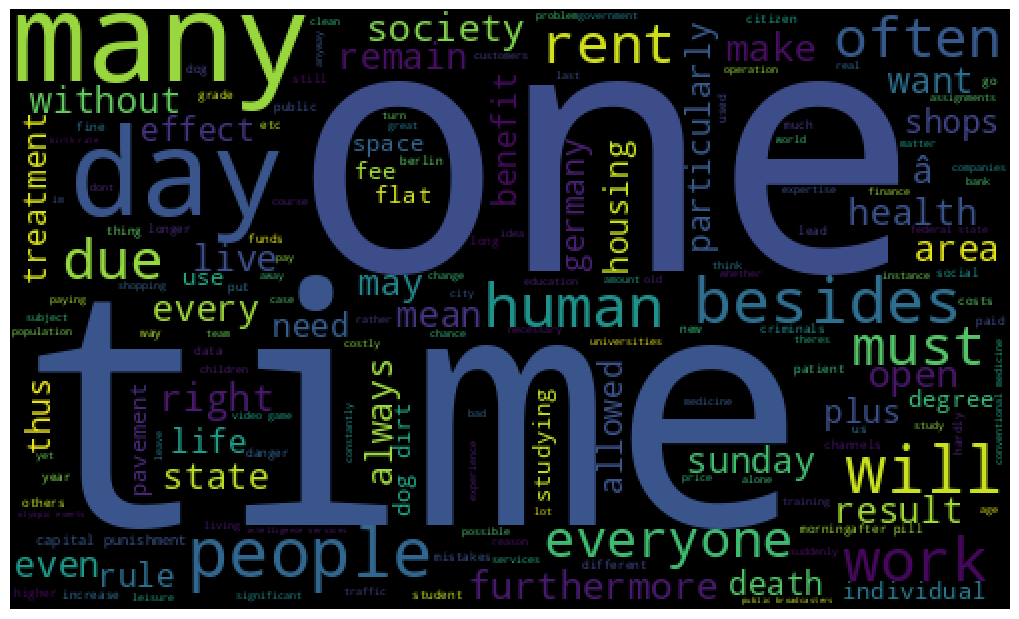

In [6]:
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(ra_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [7]:
data = data.replace(['CA','RA'],[0, 1])

In [8]:
text = pd.DataFrame(data['B'])
label = pd.DataFrame(data['Type'])

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['B'])
vectors.shape

(380, 1640)

In [10]:
features = vectors
X_train, X_test, y_train, y_test = train_test_split(features, data['Type'], test_size=0.15, random_state=111)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [12]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [13]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [14]:
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [15]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

In [16]:
pred_scores_word_vectors

[('SVC', [0.7543859649122807]),
 ('KN', [0.7368421052631579]),
 ('NB', [0.6666666666666666]),
 ('DT', [0.6842105263157895]),
 ('LR', [0.7368421052631579]),
 ('RF', [0.7368421052631579])]